### Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D

### Import Data

In [3]:
clients = pd.read_csv('C:/Users/Joy/Desktop/clientsegmentation.csv')
clients.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Data Wrangling

### Recode Gender

In [4]:
dict = {"Gender": {"Male": 0, "Female": 1}}
clients.replace(dict, inplace=True)
clients.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


### Drop columns

In [5]:
clientsTrimmed = clients.drop(['CustomerID'], axis=1)

In [6]:
clientsTrimmed.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# k-Means Analysis

In [7]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(clientsTrimmed)

KMeans(n_clusters=3)

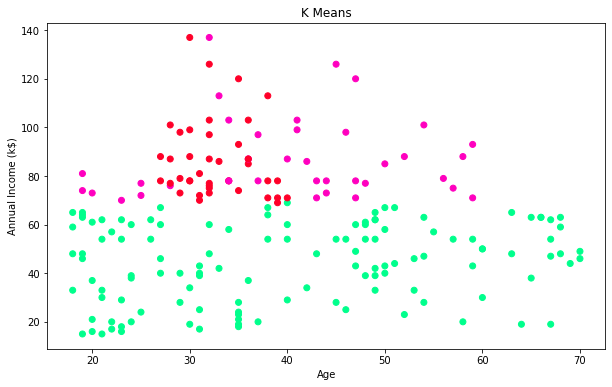

In [27]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.scatter(clientsTrimmed['Age'], clientsTrimmed['Annual Income (k$)'], 
            c=kmeans.labels_, cmap='gist_rainbow')

#### We're looking at Age and Income. 
Result shows that there is some overlap with pink and green. 
There is an age division right around the age of 40.

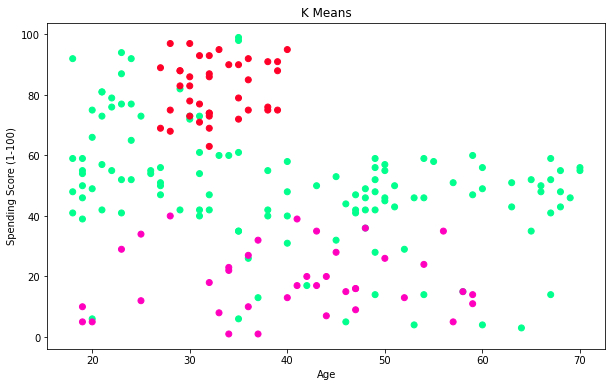

In [28]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.scatter(clientsTrimmed['Age'], clientsTrimmed['Spending Score (1-100)'], 
            c=kmeans.labels_, cmap='gist_rainbow')

#### We're looking at Age and Spending Score. 
Result shows that there is some overlap with red and pink, red and green.  
Across the age range 0-40 you can have a high Spending Score. 
Age 40 is about when Spending Scores drop from high to average and low.

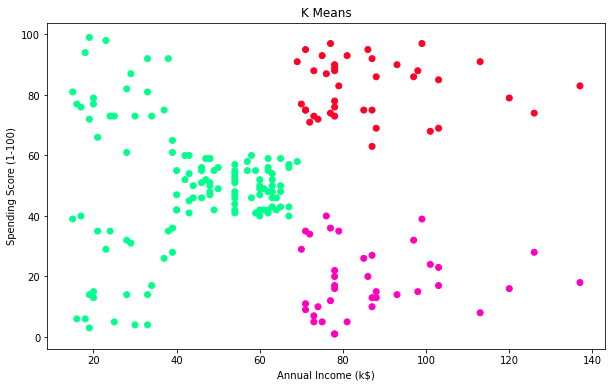

In [29]:
plt.figure(figsize=(10,6))
plt.title('K Means')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.scatter(clientsTrimmed['Annual Income (k$)'], 
            clientsTrimmed['Spending Score (1-100)'], 
            c=kmeans.labels_, cmap='gist_rainbow')

#### We're looking at Annual Income and Spending Score. 
Result shows that there is no overlap, but a lot of Mid level spenders.

## Add labels to the Dataset

In [30]:
clientsTrimmed['Category'] = kmeans.labels_

In [31]:
clientsTrimmed.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Category
0,0,19,15,39,1
1,0,21,15,81,1
2,1,20,16,6,1
3,1,23,16,77,1
4,1,31,17,40,1


## Investigate Means by Category

In [32]:
clientsTrimmed.groupby('Category')['Age'].mean()

Category
0    32.692308
1    40.325203
2    40.394737
Name: Age, dtype: float64

In [33]:
clientsTrimmed.groupby('Category')['Annual Income (k$)'].mean()

Category
0    86.538462
1    44.154472
2    87.000000
Name: Annual Income (k$), dtype: float64

In [34]:
clientsTrimmed.groupby('Category')['Spending Score (1-100)'].mean()

Category
0    82.128205
1    49.829268
2    18.631579
Name: Spending Score (1-100), dtype: float64

### To summarize
### Category 0, has a mean age 32, higher annual income 86k and very high spending score, 82/100.  
### Category 1, has a mean age 40, Annual Income 44k and averge spending score, 49/100.  
### Category 2: has a mean age 40, Annual Income 87k and a very low spending score 18/100.

### For comparison, lets find the average of all variables across each cluster:

In [21]:
avg_df = clientsTrimmed.groupby(['Category'], as_index=False).mean()
avg_df.head()

,Category,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,0.538462,32.692308,86.538462,82.128205
1,1,0.593496,40.325203,44.154472,49.829268
2,2,0.473684,40.394737,87.000000,18.631579


## Spending Score vs Annual Income vs Age

<AxesSubplot:xlabel='Category', ylabel='Age'>

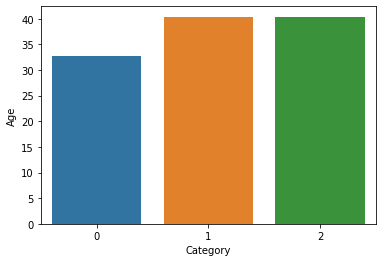

In [22]:
sns.barplot(x='Category',y='Age', data=avg_df)

<AxesSubplot:xlabel='Category', ylabel='Annual Income (k$)'>

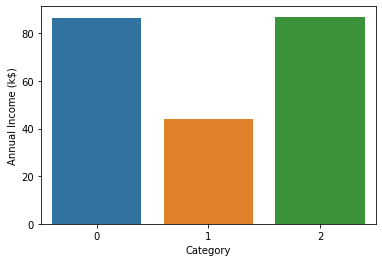

In [23]:
sns.barplot(x='Category',y='Annual Income (k$)',data=avg_df)

<AxesSubplot:xlabel='Category', ylabel='Spending Score (1-100)'>

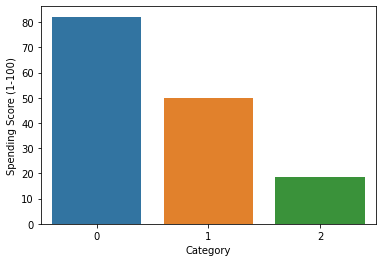

In [24]:
sns.barplot(x='Category',y='Spending Score (1-100)',data=avg_df)

## Gender Breakdown

In [26]:
df2 = pd.DataFrame(clientsTrimmed.groupby(['Category','Gender'])['Gender'].count())
df2.head()

Gender
Category Gender        
0        0           18
         1           21
1        0           50
         1           73
2        0           20

### Main attributes of each segment

Category 0: 

Average annual income, average spending score.
Mean age is around 40 and gender is predominantly female.

Category 1:

High average income, low spending score.
Mean age is around 40 and gender is predominantly male.

Category 2:

High average income, high spending score.
Mean age is around 32 and gender is split down the middle- female and male.


### Building personas around each cluster

Now that we know the attributes of each cluster, we can build personas around them and decide how to market to them.  

Category 0: Living Above Means- they make the least amount compared to all the other categories. But they have average spending habits. 

Category 1: The Frugal Spender -they could be planning for Kids college fund or retirement or both. They have to be very careful with their money as they likely have more financial responsibilities.  Discount codes, and promos will attract them to spend. 

Category 2: Implusive Young Buyer/Young Family- they make the most amount of money and spend the most. This group may be starting a family and looking at big commitments like home, cars and enjoy going on vacation. Compared to Category 2 they spend 4.5 more.

#### Conclusion
We have successfully built a K-Means clustering model for customer segmentation. We also explored cluster interpretation, and analyzed the behaviour of individuals in each cluster.

Finally, we took a look at some business recommendations that could be provided based on the attributes of each individual in the cluster.